In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.dist_dependence_measures import distance_correlation
from hyppo.independence import HHG

**<h1>1.1<h1>**

In [2]:
data = []
with open('amazon-books.txt') as f:
    lines = f.readlines()
    for line in lines:
        data.append(line.split('\t'))
data = np.array(data)     

In [3]:
db = pd.DataFrame(columns=data[0], data=data[1:])
print(db.head(1))

                                               Title       Author List Price  \
0  "1,001 Facts that Will Scare the S#*t Out of Y...  Cary McNeal      12.95   

  Amazon Price Hard/ Paper NumPages    Publisher Pub year     ISBN-10 Height  \
0         5.18           P      304  Adams Media     2010  1605506249    7.8   

  Width Thick Weight (oz)\n  
0   5.5   0.8        11.2\n  


In [4]:
price_v = db["Amazon Price"].values
page_num_v = db["NumPages"].values

price = []
page_num = []
for (x, y) in zip(price_v, page_num_v):
    if len(y) != 0:
        price.append(float(x))
        page_num.append(float(y))
price = np.array(price)
page_num = np.array(page_num)

print(len(price), len(price_v))

323 325


(0.0, 30.0)

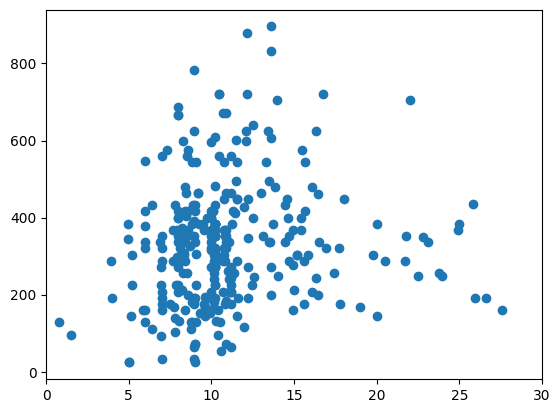

In [50]:
plt.scatter(price, page_num)
plt.xlim([0, 30])

In [46]:
def Cov(X, Y):
    cov = 0
    x_mean = X.mean()
    y_mean = Y.mean()
    for x, y in zip(X, Y):
        cov += (x - x_mean) * (y - y_mean)
    cov /= len(X)
    return cov

In [47]:
def Corr(X, Y):
    corr = 0
    sx = np.mean((X - X.mean())**2)
    sy = np.mean((Y - Y.mean())**2)
    corr = Cov(X, Y) / np.sqrt(sx * sy)
    return corr

In [49]:
Corr(price, page_num)

0.12968811316309622

In [8]:
#corr_ = Corr(price, page_num)
corr_ = np.corrcoef(price, page_num)
print(corr_)
corr_ = corr_[0, 1]

[[1.         0.12968811]
 [0.12968811 1.        ]]


In [42]:
pearson_1 = st.pearsonr(price, page_num)
spearman_1 = st.spearmanr(price, page_num)
kendall_1 = st.kendalltau(price, page_num)
szek_riz_1 = distance_correlation(price, page_num)
hhg_1 = HHG().test(price, page_num, auto=True)
crit_names = ["Pearson      ", "Spearmen     ", "Kendel       ", "Szekely-Rizzo", "HHG(pvalue)  "]
arr_coef = [pearson_1[0], spearman_1[0], kendall_1[0], szek_riz_1, hhg_1.pvalue]
for j in range(5):
    print(crit_names[j], round(arr_coef[j], 3), sep='\t', end='\n')

Pearson      	0.13
Spearmen     	0.195
Kendel       	0.132
Szekely-Rizzo	0.172
HHG(pvalue)  	0.421


In [9]:
mu_ = [price.mean(), page_num.mean()]
#cov_ = [[Cov(price, price), Cov(price, page_num)], [Cov(page_num, price), Cov(page_num, page_num)]]
cov_ = np.cov(price, page_num)
print(cov_)

[[  189.49545991   289.18298704]
 [  289.18298704 26238.94238794]]


In [10]:
bt_data = np.random.multivariate_normal(mu_, cov_, (len(price), len(page_num)))
corr_bt = np.zeros(100)
for i in range(100):
    bt_data = np.random.multivariate_normal(mu_, cov_, size=len(price))
    X = (np.array(bt_data).T)[0]
    Y = (np.array(bt_data).T)[1]
    #corr_bt[i] = Corr(X, Y)
    corr_bt[i] = np.corrcoef(X, Y)[0, 1]
corr_bt = np.sort(corr_bt)

In [11]:
print(corr_bt)

[-0.00433397  0.01061388  0.02661546  0.02886861  0.0299969   0.03384235
  0.03593783  0.03705913  0.03928919  0.03974105  0.04874624  0.05907001
  0.06202182  0.06537847  0.06668914  0.07870106  0.08263149  0.08743361
  0.08838825  0.0901353   0.09039803  0.09603663  0.0976283   0.09871374
  0.09883951  0.10113596  0.10238004  0.10254152  0.10318469  0.10318619
  0.10330056  0.10482267  0.1048308   0.10646007  0.10679868  0.10938811
  0.10998905  0.11249265  0.11659872  0.11718144  0.1190832   0.12172017
  0.12193808  0.12216057  0.12219853  0.12557788  0.12752098  0.12766905
  0.12771367  0.12866125  0.12869372  0.13037246  0.13042783  0.13265853
  0.1345287   0.13491922  0.13542213  0.13550184  0.13555407  0.13588708
  0.13769058  0.13807105  0.13897927  0.14091117  0.14094046  0.14473149
  0.14607183  0.14629652  0.14947991  0.14976593  0.15010221  0.15094212
  0.15145847  0.1532288   0.15609244  0.15724015  0.15845344  0.15876722
  0.15924476  0.16526403  0.16566431  0.17050735  0

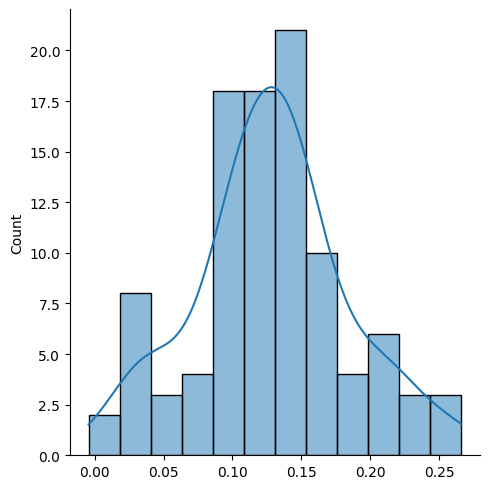

In [12]:
sb.displot(corr_bt, kde="True")

In [13]:
x_g = np.quantile(corr_bt, 0.025)
x_b = np.quantile(corr_bt, 1 - 0.025)
print((x_g, x_b))

(0.02768570849125276, 0.2430283124356813)


**Percentile**

In [14]:
per_l = 0
per_r = 0
for i in range(len(corr_bt)):
    if corr_bt[i] > x_g:
        per_l = corr_bt[i - 1]
        break
for i in range(len(corr_bt)-1, 0, -1):
    if corr_bt[i] < x_b:
        per_r = corr_bt[i + 1]
        break
print((per_l, per_r))

(0.0266154601582069, 0.2507857371825394)


In [15]:
print(corr_)

0.1296881131630963


**Pivotal**

In [16]:
delta = corr_bt - corr_
delta = np.sort(delta)

In [17]:
print(corr_ - delta)

[ 0.26371019  0.24876235  0.23276077  0.23050761  0.22937933  0.22553387
  0.2234384   0.2223171   0.22008703  0.21963518  0.21062999  0.20030621
  0.19735441  0.19399776  0.19268709  0.18067517  0.17674473  0.17194261
  0.17098798  0.16924093  0.16897819  0.1633396   0.16174792  0.16066248
  0.16053672  0.15824027  0.15699618  0.15683471  0.15619154  0.15619003
  0.15607566  0.15455355  0.15454543  0.15291615  0.15257755  0.14998812
  0.14938718  0.14688357  0.14277751  0.14219478  0.14029302  0.13765606
  0.13743815  0.13721565  0.13717769  0.13379835  0.13185525  0.13170718
  0.13166256  0.13071498  0.1306825   0.12900377  0.1289484   0.12671769
  0.12484753  0.12445701  0.1239541   0.12387438  0.12382216  0.12348915
  0.12168565  0.12130518  0.12039696  0.11846506  0.11843577  0.11464474
  0.1133044   0.11307971  0.10989632  0.1096103   0.10927402  0.10843411
  0.10791776  0.10614743  0.10328379  0.10213607  0.10092279  0.10060901
  0.10013147  0.09411219  0.09371191  0.08886887  0

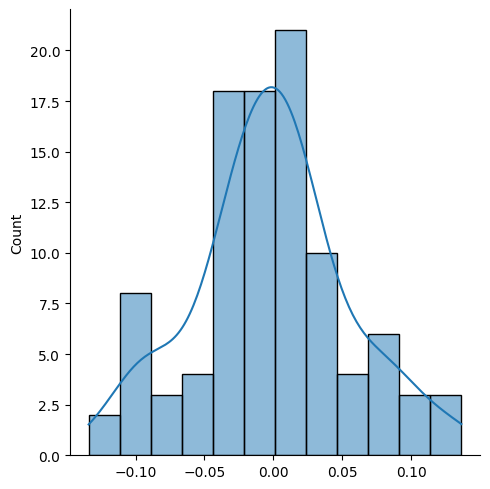

In [18]:
sb.displot(delta, kde="True")

In [19]:
x_g = np.quantile(delta, 0.025)
x_b = np.quantile(delta, 1 - 0.025)
print((corr_ - x_b, corr_ - x_g))

(0.016347913890511323, 0.23169051783493985)


In [20]:
piv_l = 0
piv_r = 0
for i in range(len(delta)):
    if delta[i] > x_g:
        piv_l = delta[i - 1]
        break
for i in range(len(delta) - 1, 0, -1):
    if delta[i] < x_b:
        piv_r = delta[i + 1]
        break
print((corr_ - piv_r, corr_ -  piv_l))

(0.008590489143653235, 0.23276076616798572)


In [21]:
print(corr_)

0.1296881131630963


**<h1>1.2<h1>**

In [22]:
db = []
with open('babysamp-98.txt') as f:
    lines = f.readlines()
    for line in lines:
        db.append(line.split())
db = np.array(db)        

In [23]:
db_s = []
for el in db:
    if el[7] == 'F':
        db_s.append(0)
    elif el[7] == 'M':
        db_s.append(1)
db_s = np.array(db_s)
print(len(db_s))

200


In [24]:
theta_ = db_s.mean()
sigma_ = theta_ * (1 - theta_)
print(theta_, sigma_)

0.515 0.249775


In [25]:
alpha = 0.05
z_a = st.norm.ppf(1 - alpha / 2)
print(z_a)

1.959963984540054


In [26]:
print((theta_ - (z_a * sigma_) / np.sqrt(len(db_s)), theta_ + (z_a * sigma_) / np.sqrt(len(db_s))))

(0.48038358722730595, 0.5496164127726941)


In [27]:
print(db_s)

[0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1]


In [28]:
k = sum(db_s)
n = len(db_s)
print(k, n)

103 200


In [29]:
t_1 = -1
t_2 = -1
for t in np.linspace(0, 1, 1000):
    if abs(st.binom.cdf(k, n, t) - alpha / 2) < 0.001:
        t_1 = t
        if t_2 != -1:
            break
    if abs(st.binom.cdf(k - 1, n, t) - 1 + alpha / 2) < 0.001:
        t_2 = t
        if t_1 != -1:
            break

In [30]:
print((t_2, t_1))

(0.44344344344344344, 0.5855855855855856)


**<h1>1.3<h1>**

In [31]:
def G_inv(mean, sigma, n, z):
    return mean - sigma * z / np.sqrt(n)

In [32]:
data = []
with open('nissan.txt') as f:
    lines = f.readlines()
    for line in lines:
        data.append(line)
data = np.array(data)   

In [33]:
X = np.array([float(x) for x in data[1:]])
print(X)

[21.964 23.694 18.824 20.851 26.37  22.81  25.785 24.353 23.385 23.381
 28.175 21.232 25.603 21.064 22.067 23.867 24.226 19.512 22.147 19.948
 22.65  21.197 20.748 20.351 26.54  25.385 21.613 21.4   22.035 21.81
 23.806 23.678 26.462 21.514 19.7   18.362 25.403 23.158 22.091 23.768
 20.201 21.111 20.573 27.434 20.256 22.687 25.206 21.169 22.747 24.
 19.375 26.113 20.625 21.511 21.441 21.98  21.667 20.26  19.125 23.652
 18.693 18.374 24.885 21.405 21.806 25.111 20.903 19.343 23.235 25.088
 20.9   28.037 19.789 22.576 21.374 26.894 20.139 21.399 16.767 14.684
 21.739 23.803 20.563 25.188 25.794 24.122 23.356 24.632 23.407 22.958
 20.815 20.762 21.194 21.667 23.979 24.514 24.5   22.344 22.847 19.551]


In [34]:
S2 = 0
for x in X:
    S2 += (x - X.mean())**2
S2 *= 1 / (len(X) - 1)
print(S2)

5.98847986858586


In [35]:
print(X.mean())

22.411990000000007


Accurate

In [38]:
alpha = 0.05
beta = alpha / 2
z_ab = st.t.ppf(1 - alpha + beta, len(X) - 1)
z_b = st.t.ppf(beta, len(X) - 1)
print([G_inv(X.mean(), np.sqrt(S2), len(X), z_ab), G_inv(X.mean(), np.sqrt(S2), len(X), z_b)])

[21.926424913119547, 22.897555086880466]


Asymptotic

In [85]:
z_a = scipy.stats.norm.ppf(1 - alpha / 2)
print((X.mean() - z_a * np.sqrt(S2) / np.sqrt(len(X)), X.mean() + z_a * np.sqrt(S2) / np.sqrt(len(X))))

(21.932359946586665, 22.891620053413348)


Bootstrap

In [86]:
bt_S = 0
for i in range(100):
    Y = np.random.normal(loc=X.mean(), scale=np.sqrt(S2), size=len(X))
    bt_S += (Y.mean() - X.mean())**2
bt_S = bt_S / 100
print((X.mean() - z_a * np.sqrt(bt_S), X.mean() + z_a * np.sqrt(bt_S)))

(21.93119404981628, 22.892785950183733)
